<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 300%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📈Stock Market Prediction📈</div>

<img src="https://miro.medium.com/v2/resize:fit:1400/0*dtiuqS8kNB66Mp5P" alt="Stock Market Predictor">

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📜 Notebook Objective📜</b> The aim of this notebook is to predict the closing price of the 'CAT_2006-01-01_to_2018-01-01' dataset. This dataset includes five features from 2006 to 2018:

- Open Price
- Close Price
- High Price
- Low Price
- Volume

In this project, I predict the closing price by considering all features. Given the time series nature of this dataset, I chose to use Long Short-Term Memory (LSTM) networks to achieve better results.

Let's dive into the project! 📈✨
</div>

<a id="table of content"></a>

<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜Table of Content📜</div>

<a id="contents_tabel"></a>   

* [1- Importing Libraries📚](#1)
    
* [2- Loading the Dataset📊](#2)
    
* [3- Dataset Overview🔍](#3)

    * [3-1- Checking Null Values📊](#4)
    
    * [3-2- Visualization📊](#5)
    
* [4- Preprocessing🛠️](#6)

    * [4-1- Scaling📏](#7)
    
    * [4-2- Preparing Sequence data📈](#8)
        
* [5- LSTM Model🧠](#9)     
     
    * [5-1- Building the Architecture ⚡](#10)
    
    * [5-2- Model Training & Learning Rate Tuning🚀](#11)
    
    * [5-3- Model Evaluation & Prediction⚖️](#12)

    * [5-4- Plotly Visualization for Test Data📊](#13)
    
* [6- Conclusion📈](#14)    

<a id='1'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📚Importing Libraries📚</div>

⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [2]:
# Install necessary libraries
!pip install tensorflow pydot
from tensorflow.keras.utils import plot_model

<a id='2'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📚Loading the Dataset📚</div>

⬆️ [Tabel of Contents](#contents_tabel)

In [4]:
# Load the dataset
df = pd.read_csv('/kaggle/input/stock-time-series-20050101-to-20171231/CAT_2006-01-01_to_2018-01-01.csv')

<a id='3'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔍Dataset Overview🔍</div>

⬆️ [Tabel of Contents](#contents_tabel)


In [5]:
# Display the first few rows of the dataset
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,57.87,58.11,57.05,57.80,3697500,CAT
1,2006-01-04,57.95,59.43,57.55,59.27,4577200,CAT
2,2006-01-05,59.02,59.86,59.00,59.27,4590700,CAT
3,2006-01-06,59.47,60.76,59.38,60.45,5692300,CAT
4,2006-01-09,60.45,61.68,60.45,61.55,4409300,CAT


In [6]:
print('Some information about the dataset:')
print(df.info())

Some information about the dataset:

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 3020 entries, 0 to 3019

Data columns (total 7 columns):

 #   Column  Non-Null Count  Dtype  

---  ------  --------------  -----  

 0   Date    3020 non-null   object 

 1   Open    3019 non-null   float64

 2   High    3019 non-null   float64

 3   Low     3019 non-null   float64

 4   Close   3020 non-null   float64

 5   Volume  3020 non-null   int64  

 6   Name    3020 non-null   object 

dtypes: float64(4), int64(1), object(2)

memory usage: 165.3+ KB

None


In [7]:
# Drop the Name Column
df = df.drop(['Name'], axis=1)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the date as the index
df.set_index('Date', inplace=True)

<a id='4'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📊Checking Null Values📊</div>

⬆️ [Tabel of Contents](#contents_tabel)

This dataset contains some null values. To address this challenge, I decided to use `df.interpolate`.

`df.interpolate` is a powerful method in pandas that fills in missing values using various interpolation techniques. It estimates missing data points within the range of existing data, ensuring a smoother and more continuous dataset. By using interpolation, we can maintain the integrity of our time series data, which is crucial for accurate predictions.

In [8]:
df.isnull().sum()

Open      1
High      1
Low       1
Close     0
Volume    0
dtype: int64

In [9]:
# Handle missing values
df = df.interpolate(method='linear')

In [10]:
print('After handling missing values:')
df.isnull().sum()

After handling missing values:


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<a id='5'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📊Visualization📊</div>

⬆️ [Tabel of Contents](#contents_tabel)

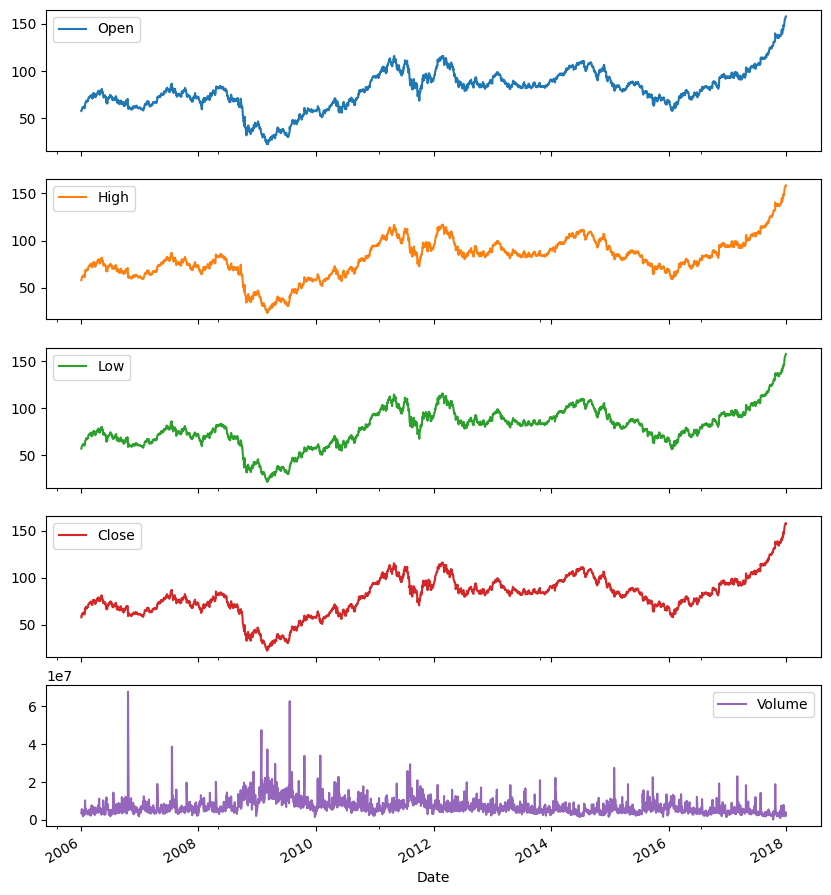

In [11]:
df.plot(subplots=True, figsize=(10,12))
plt.show()

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
As observed, the market price broke its historical resistance towards the end of the time period.
</div>

<a id='6'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🛠️Preprocessing🛠️</div>

⬆️ [Tabel of Contents](#contents_tabel)

As this is a time series dataset, we can't use `train_test_split()` to split the data into training and testing sets. Instead, I decided to split the data by determining 80% of the entire time period and using this value to create the training and testing sets.

In [12]:
# Split the data into training and testing sets
split_idx = int(len(df) * 0.8)
train_data = df[:split_idx]
test_data = df[split_idx:]

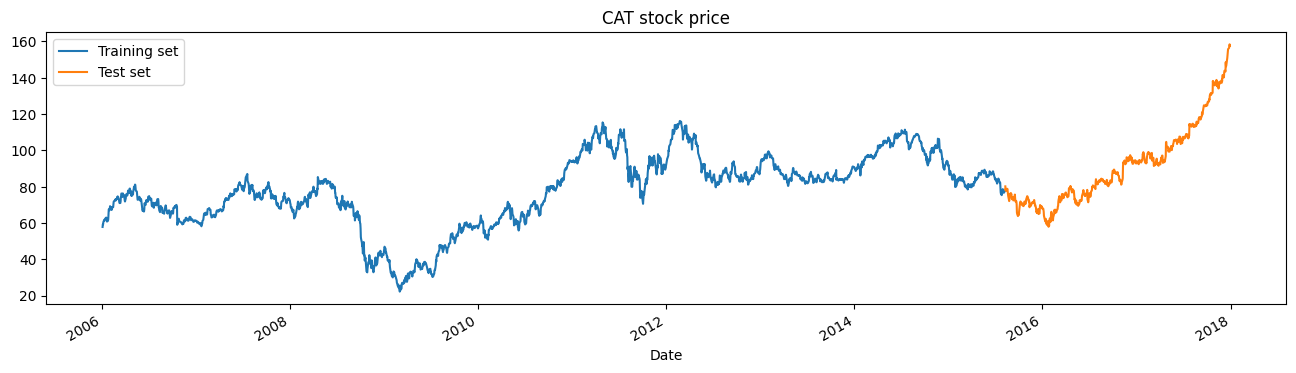

In [13]:
# We have chosen 'Close' attribute for prices. Let's see what it looks like
df["Close"][:split_idx].plot(figsize=(16,4),legend=True)
df["Close"][split_idx:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set','Test set'])
plt.title('CAT stock price')
plt.show()

<a id='7'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📏Scaling📏</div>

⬆️ [Tabel of Contents](#contents_tabel)


The following code snippet demonstrates how to normalize time series data using `MinMaxScaler` from the `sklearn.preprocessing` module. The scaler is first fitted to the training data to learn the scaling parameters, ensuring that the feature values are mapped to a range between 0 and 1. After fitting, the training data is transformed using these parameters, and the same transformation is applied to the test data, ensuring consistency between both datasets. This normalization process is essential for improving the performance and convergence of the LSTM model. 🌟

In [14]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data and transform both training and testing data
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

<a id='8'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📈Preparing Sequence data📈</div>

⬆️ [Tabel of Contents](#contents_tabel)


In [15]:
# Prepare the data for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length, 3]  # Target is the 'Close' price
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

This code snippet defines a function `create_sequences` to prepare the sequence data for the LSTM model. The function takes two arguments: the data and the sequence length (`seq_length`). It iterates through the dataset, creating sequences of a specified length (`seq_length`). Each sequence (`x`) consists of the features from `i` to `i + seq_length`, and the corresponding target value (`y`) is the 'Close' price at `i + seq_length`. This function returns two numpy arrays: `xs` containing the input sequences and `ys` containing the corresponding target values, which are essential for training the LSTM model to predict future prices based on historical data. 📊✨

In [16]:
SEQ_LENGTH = 60  # Number of days to look back
X_train, y_train = create_sequences(scaled_train_data, SEQ_LENGTH)
X_test, y_test = create_sequences(scaled_test_data, SEQ_LENGTH)

<a id='9'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🧠LSTM model🧠</div>

<a id='10'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">⚡Building the Architecture⚡</div>

⬆️ [Tabel of Contents](#contents_tabel)


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
The following code snippet creates an LSTM model using the Keras `Sequential` API. The model is designed for time series prediction with the following layers:

1. **First LSTM Layer**: Consists of 50 units and returns sequences, allowing the next LSTM layer to receive sequences. It takes an input shape defined by `SEQ_LENGTH` (the sequence length) and 5 features.
2. **Dropout Layer**: Drops 20% of the neurons randomly during training to prevent overfitting.
3. **Second LSTM Layer**: Consists of 50 units and does not return sequences, as it outputs the final hidden state.
4. **Dropout Layer**: Another dropout layer to further reduce overfitting.
5. **Dense Layer**: A fully connected layer with 25 neurons.
6. **Output Dense Layer**: A single neuron layer that provides the final prediction for the closing price.

This architecture allows the model to capture temporal dependencies in the data and make accurate predictions. 🧠📈
</div>

In [17]:
# Create LSTM model
model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 5)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])

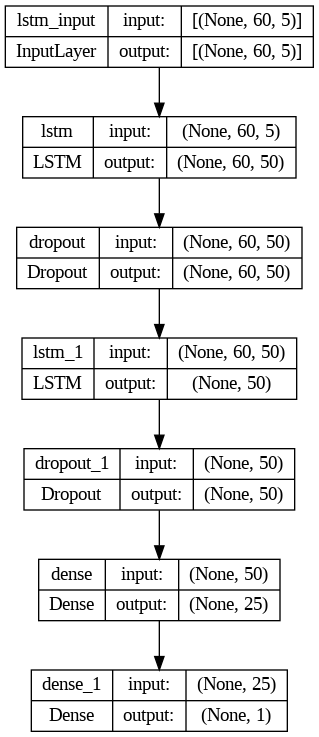

In [18]:
# Visualize the model architecture
plot_model(model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

# Display the image (optional)
from IPython.display import Image
Image('lstm_model.png')

In [19]:
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 lstm (LSTM)                 (None, 60, 50)            11200     

                                                                 

 dropout (Dropout)           (None, 60, 50)            0         

                                                                 

 lstm_1 (LSTM)               (None, 50)                20200     

                                                                 

 dropout_1 (Dropout)         (None, 50)                0         

                                                                 

 dense (Dense)               (None, 25)                1275      

                                                                 

 dense_1 (Dense)             (None, 1)                 26        

                                                                 


Total params: 32701 (127.74 KB)

Traina

<a id='11'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🚀 Model Training & Learning Rate Tuning🚀</div>

⬆️ [Tabel of Contents](#contents_tabel)


The following code snippet explores the effect of different learning rates on the performance of an LSTM model using the Adam optimizer. The learning rates tested are [0.0001, 0.0005, 0.001, 0.005, 0.01]. For each learning rate, the model is compiled with the specified rate, trained for 20 epochs with a batch size of 32, and then evaluated on the test data. The results, which show the Mean Absolute Error (MAE) for each learning rate, are collected and printed.

In [20]:
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01]
results = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    # Compile the model with the current learning rate
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mean_absolute_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    # Evaluate the model
    loss = model.evaluate(X_test, y_test)
    results.append((lr, loss))
    print(f"Learning Rate: {lr} - Test MAE: {loss}")

    # Save the model
    model.save(f'model_lr_{lr}.h5')



Training with learning rate: 0.0001

17/17 [==============================] - 1s 6ms/step - loss: 0.0262

Learning Rate: 0.0001 - Test MAE: 0.02624768577516079



Training with learning rate: 0.0005


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

  saving_api.save_model(


17/17 [==============================] - 1s 4ms/step - loss: 0.0254

Learning Rate: 0.0005 - Test MAE: 0.025389129295945168



Training with learning rate: 0.001

17/17 [==============================] - 1s 4ms/step - loss: 0.0151

Learning Rate: 0.001 - Test MAE: 0.015058296732604504



Training with learning rate: 0.005

17/17 [==============================] - 1s 4ms/step - loss: 0.0198

Learning Rate: 0.005 - Test MAE: 0.0198353361338377



Training with learning rate: 0.01

17/17 [==============================] - 1s 4ms/step - loss: 0.0302

Learning Rate: 0.01 - Test MAE: 0.030185461044311523


In [21]:
# Print all results
for lr, loss, in results:
    print(f"Learning Rate: {lr} - Test MAE: {loss}")

Learning Rate: 0.0001 - Test MAE: 0.02624768577516079

Learning Rate: 0.0005 - Test MAE: 0.025389129295945168

Learning Rate: 0.001 - Test MAE: 0.015058296732604504

Learning Rate: 0.005 - Test MAE: 0.0198353361338377

Learning Rate: 0.01 - Test MAE: 0.030185461044311523


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
The results indicate that a learning rate of 0.001 yields the lowest test MAE, suggesting it is the most effective rate for this specific model and dataset configuration. Conversely, too high a learning rate (0.01) leads to poorer performance, as evidenced by the increased MAE, likely due to the model failing to converge properly. This experiment highlights the importance of tuning the learning rate to optimize model performance. 🔍📉
</div>

<a id='12'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">⚖️Model Evaluation & Prediction⚖️</div>

⬆️ [Tabel of Contents](#contents_tabel)


In [28]:
model_path = '/content/model_lr_0.001.h5'
model = load_model(model_path)

loss = model.evaluate(X_test, y_test)
print(f"Model Evaluation:\nMAE: {loss}")

17/17 [==============================] - 1s 6ms/step - loss: 0.0151

Model Evaluation:

MAE: 0.015058296732604504


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
To plot the 'Close' price against the predicted price for the entire time period, we can concatenate the predictions from both the training and testing datasets.


In this code snippet:
- `model.predict(X_train)` and `model.predict(X_test)` are used to obtain predictions for the training and testing datasets, respectively.
- These predictions are then concatenated along the axis 0 to create a single array (`predicted`) containing predictions for the entire time period.
</div>

In [29]:
train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)
predicted = np.concatenate([train_predicted, test_predicted], axis=0)

74/74 [==============================] - 1s 5ms/step

17/17 [==============================] - 0s 5ms/step


The following code snippet prepares the predicted prices for inverse transformation and then applies the inverse transformation to get the predicted prices back into their original scale.

In [30]:
# Prepare the array for inverse transformation
predicted_full = np.zeros((predicted.shape[0], scaled_train_data.shape[1]))
predicted_full[:, 3] = predicted[:, 0]  # Place predicted 'Close' price in the correct column

# Inverse transform
predicted_prices = scaler.inverse_transform(predicted_full)[:, 3]

After running these steps, predicted_prices will contain the predicted 'Close' prices in their original scale, ready for comparison with the actual 'Close' prices and further analysis. This approach ensures that predictions are interpreted correctly in the context of the original dataset. 📉💡

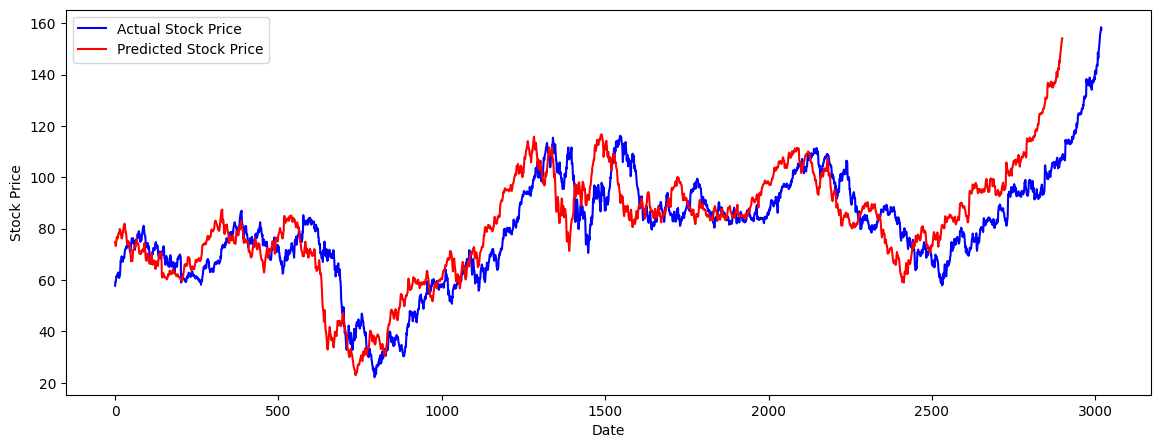

In [31]:
plt.figure(figsize=(14, 5))
plt.plot(df['Close'].values, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
This visualization will help us assess how well our LSTM model predicts the 'Close' prices across the entire dataset. 📊✨
</div>

<a id='13'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📊Plotly Visualization for Test Data📊</div>

⬆️ [Tabel of Contents](#contents_tabel)


In [32]:
# Inverse transform for test_predicted
predicted_full_test = np.zeros((test_predicted.shape[0], scaled_train_data.shape[1]))
predicted_full_test[:, 3] = test_predicted[:, 0]  # Place predicted 'Close' price in the correct column
predicted_prices_test = scaler.inverse_transform(predicted_full_test)[:, 3]

# Inverse transform y_test
y_test_full = np.zeros((y_test.shape[0], scaled_train_data.shape[1]))
y_test_full[:, 3] = y_test
y_test_actual = scaler.inverse_transform(y_test_full)[:, 3]

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
In the following code:

- `plotly.graph_objects` is imported as `go` for creating interactive plots.

- `dates` should contain the index or dates corresponding to the test data.

- `y_test_actual` should be the actual 'Close' prices from the test dataset.

- `predicted_prices_test` should be the predicted 'Close' prices after inverse transformation for the test dataset.

This setup will generate an interactive plot using Plotly, displaying both the actual and predicted stock prices over time. 📊✨
</div>

In [33]:
# Extract the Date for the x-axis
dates = test_data.index

# Plot the results using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=dates, y=y_test_actual, mode='lines', name='Actual Stock Price'))
fig.add_trace(go.Scatter(x=dates, y=predicted_prices_test, mode='lines', name='Predicted Stock Price'))

fig.update_layout(title='Stock Price Prediction',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  legend_title='Legend')

fig.show()

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
Clearly, our model performs well, particularly during periods when historical resistance levels remain intact. However, post-breakout, the disparity between actual and predicted prices widens compared to pre-breakout periods.
It's worth noting that using a single feature would result in our predictions flattening after breaking historical resistance. Incorporating multiple features allows our model to maintain effectiveness in such scenarios.
</div>

<a id='14'></a>
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📈Conclusion📈</div>

⬆️ [Tabel of Contents](#contents_tabel)


<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
✨In conclusion, our LSTM model effectively predicts stock prices, demonstrating strong performance under stable market conditions. However, it faces challenges post-breakout, where discrepancies between actual and predicted prices increase. By leveraging multiple features, our model maintains robustness and adaptability, crucial for navigating dynamic market shifts.✨
</div>

<img src="https://thumbs.dreamstime.com/b/top-view-coffee-pen-notebook-written-statement-thank-you-your-attention-wooden-background-180898877.jpg" alt="Thanks">